In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [51]:
df=pd.read_csv('insurance_data.csv')

In [52]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


## Column Types

### Numerical: PatientID ,age ,bmi,bloodpressure,claim,children.
### Categorical:gender ,diabetic,smoker.
###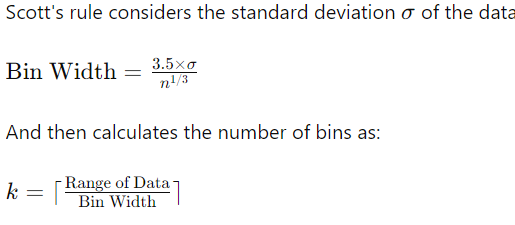 Mixed: region

### Univariate Analysis

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


In [53]:
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


## Age
** Conclusions**
 - The column is normally distributed.
 - No outliers in the column.
 - Nearly 0.003 % values are null.
 - Filled all the missing values by the mean of the column

In [54]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

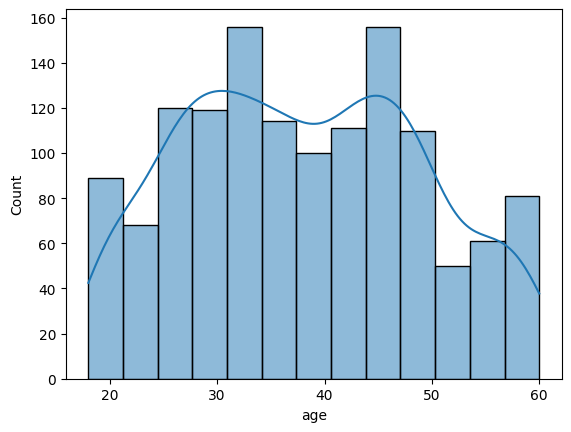

In [55]:
sns.histplot(df['age'], kde=True)
plt.show()

<Axes: ylabel='Density'>

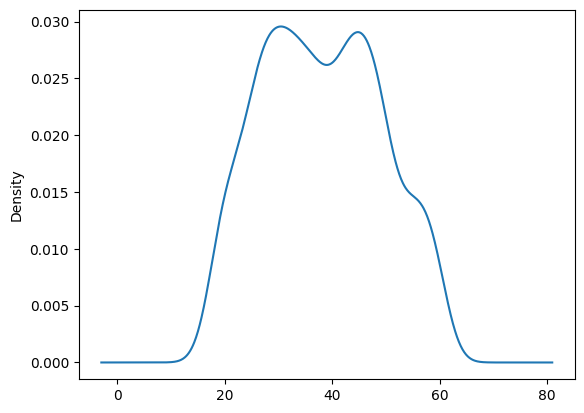

In [56]:
df['age'].plot(kind='kde')

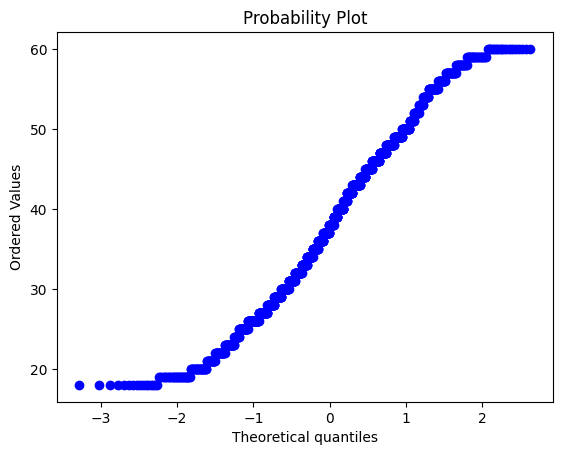

In [57]:
import scipy.stats as stats
stats.probplot(df['age'], dist="norm", plot=plt)
plt.show()

In [58]:
df['age'].skew()

0.11361133741072633

<Axes: >

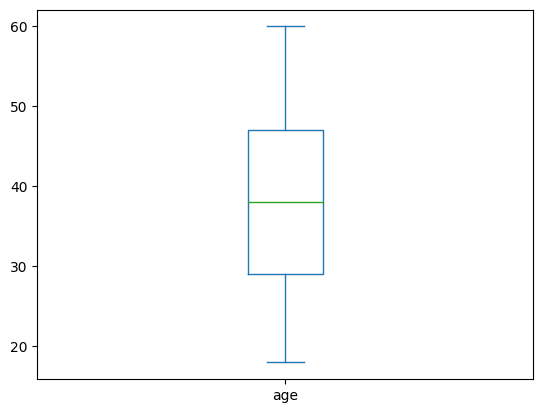

In [59]:
df['age'].plot(kind='box')

In [60]:
df['age'].isnull().sum()/len(df['age'])

0.0037313432835820895

In [61]:
df['age'].fillna(df['age'].mean(), inplace=True)

### BMI
** Conclusion**
- Column is normally distributed
- No missing values.
- There are some outliers in the column

In [62]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<Axes: ylabel='Frequency'>

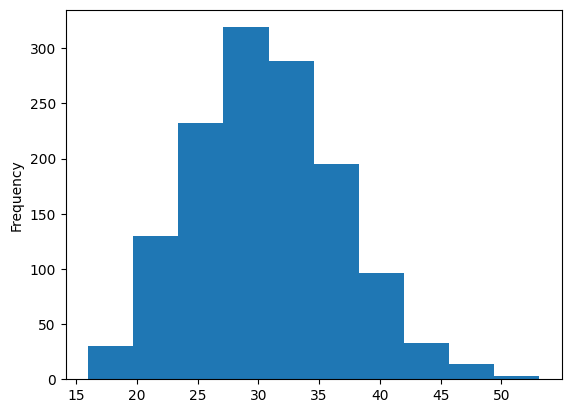

In [63]:
df['bmi'].plot(kind='hist')

<Axes: ylabel='Density'>

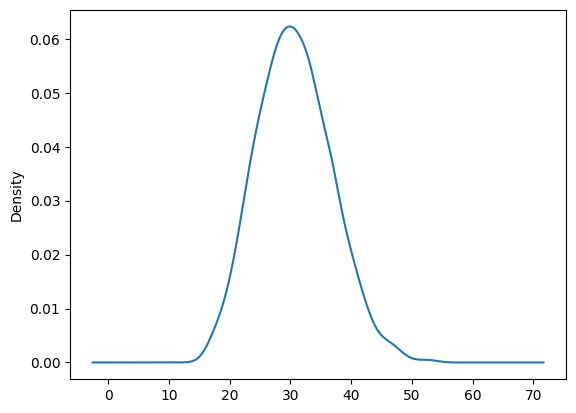

In [64]:
df['bmi'].plot(kind='kde')

In [65]:
df['bmi'].skew()

0.28597245020808587

<Axes: >

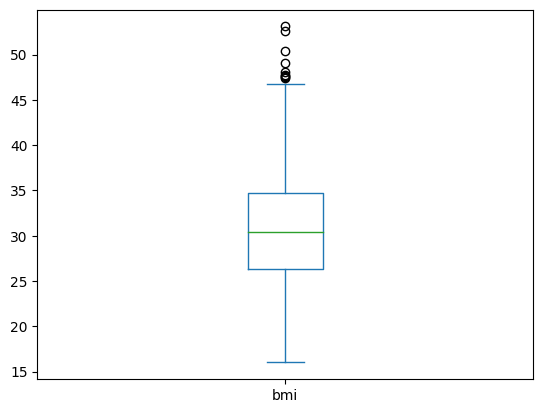

In [66]:
df['bmi'].plot(kind ='box')

In [67]:
df[df['bmi']>46]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,141,142,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
190,190,191,28.0,male,46.5,94,No,1,No,southeast,2927.06
331,331,332,43.0,male,46.5,83,Yes,2,No,southeast,4686.39
464,464,465,20.0,male,46.5,89,No,3,No,southeast,6435.62
579,579,580,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,675,676,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
682,682,683,27.0,female,46.1,106,No,1,No,southeast,9549.57
696,696,697,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,802,803,42.0,male,49.1,109,Yes,0,No,southeast,11381.33


In [68]:
df['bmi'].isnull().sum()

0

### Blood Pressure
** Conclusion**
- column is positively skewed, so median is used as it provides a better central tendency measure than the mean.
- There are many outliers in the column.
- There is no null values in the column.

In [69]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: ylabel='Frequency'>

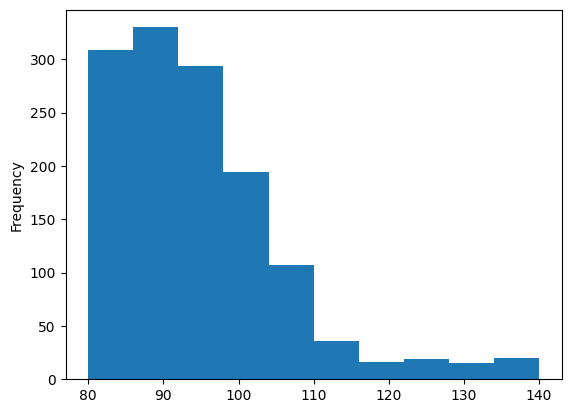

In [70]:
df['bloodpressure'].plot(kind='hist')

<Axes: ylabel='Density'>

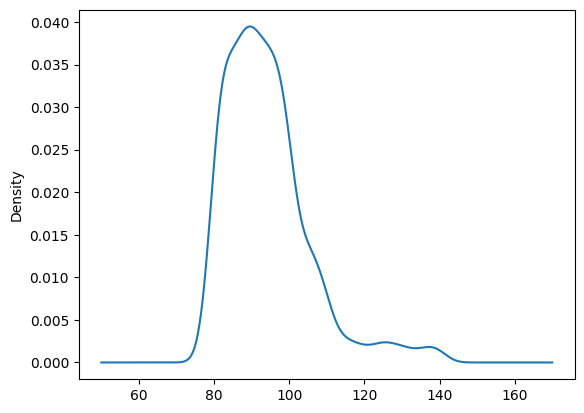

In [71]:
df['bloodpressure'].plot(kind='kde')

In [72]:
df['bloodpressure'].skew()

1.4835342102293079

<Axes: >

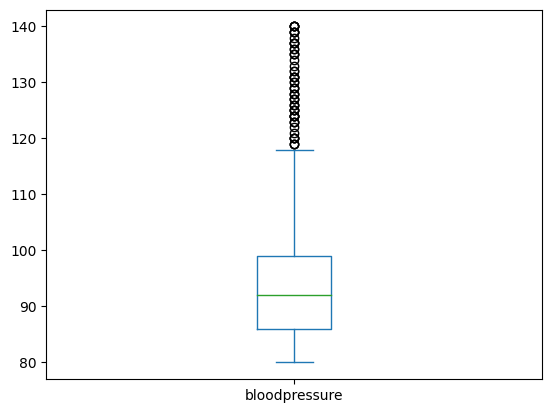

In [73]:
df['bloodpressure'].plot(kind ='box')

In [74]:
df[df['bloodpressure']>120]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1147,1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
1156,1156,1157,46.0,female,23.0,137,Yes,0,Yes,southeast,27037.91
1161,1161,1162,22.0,male,22.4,137,Yes,2,No,northeast,27375.90
1166,1166,1167,23.0,male,26.7,123,Yes,0,Yes,northeast,28101.33
1169,1169,1170,27.0,male,36.7,130,No,1,No,northwest,28468.92
1174,1174,1175,44.0,female,29.1,139,No,0,Yes,northwest,29141.36


In [75]:
df['bloodpressure'].isnull().sum()

0

### Childeren
** Conclusion **
- Column is moderately right skewed.
- There are no outliers .
- There is no null value present.

In [76]:
df['children'].describe()

count    1340.000000
mean        1.093284
std         1.205334
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

<Axes: ylabel='Density'>

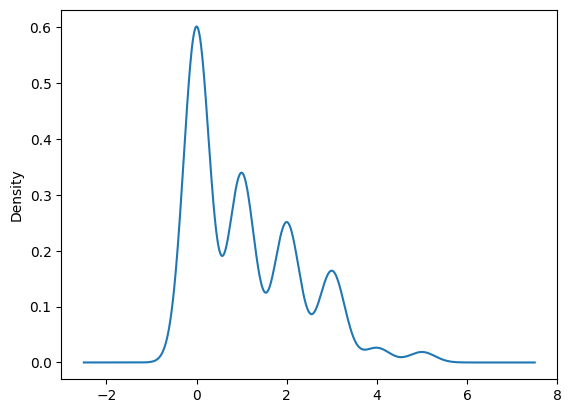

In [77]:
df['children'].plot(kind='kde')

In [78]:
df['children'].skew()

0.9402991133470963

<Axes: >

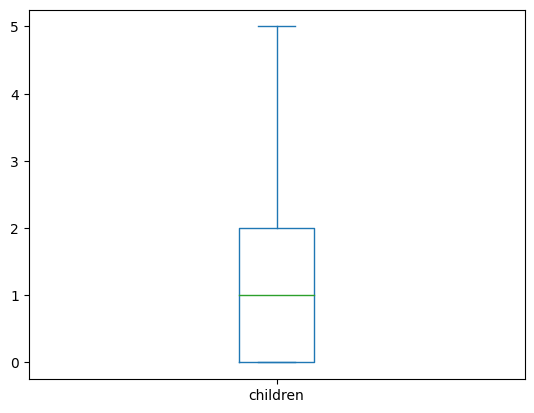

In [79]:
df['children'].plot(kind ='box')

<Axes: xlabel='children', ylabel='Density'>

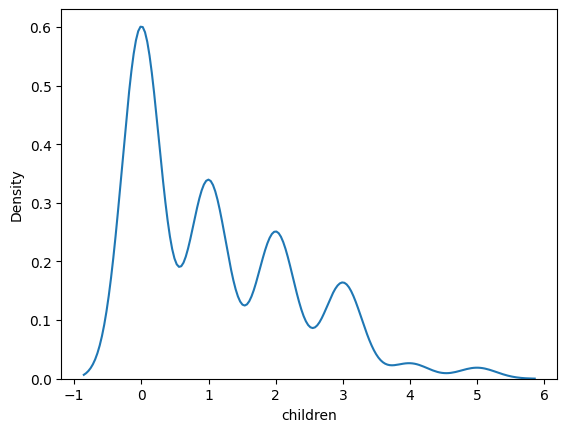

In [49]:
sns.kdeplot(df["children"])

In [80]:
df['children'].isnull().sum()

0

### Claim
** Conclusion **
- Column is highly right skewed ,mean is not a good measure for central tendancy  ,we should use median.
- Column contains a large number of outliers.
- There is no missing values in the column

In [81]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<Axes: ylabel='Frequency'>

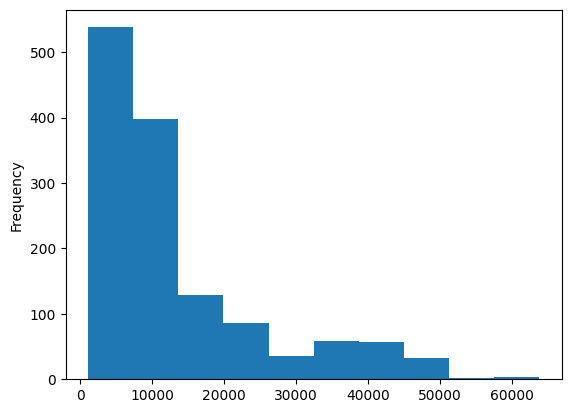

In [83]:
df['claim'].plot(kind ='hist')

<Axes: ylabel='Density'>

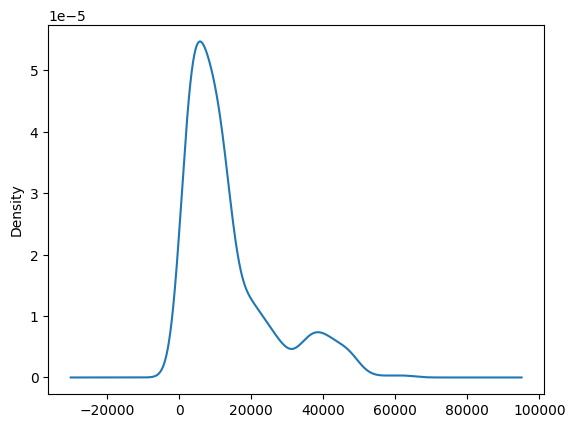

In [84]:
df['claim'].plot(kind ='kde')

In [85]:
df['claim'].skew()

1.5167468509489237

<Axes: >

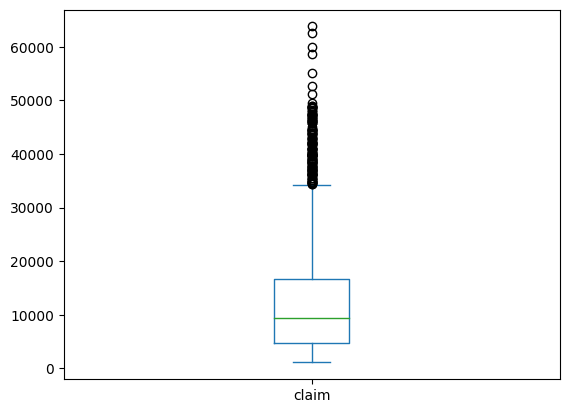

In [86]:
df['claim'].plot(kind ='box')

In [87]:
df[df['claim']>35000]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1207,1207,1208,22.0,male,22.9,80,No,0,Yes,northeast,35069.37
1208,1208,1209,23.0,male,28.5,106,No,0,Yes,northeast,35147.53
1209,1209,1210,32.0,female,26.8,107,No,1,No,southwest,35160.13
1210,1210,1211,25.0,male,30.8,140,Yes,0,Yes,southwest,35491.64
1211,1211,1212,22.0,male,35.6,97,Yes,0,Yes,southwest,35585.58
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [88]:
df['claim'].isnull().sum()

0

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Gender
** Conclusion **
- Male and Female are almost equal in number.
- Column does not contains any null value.

In [89]:
df['gender'].value_counts()

gender
male      678
female    662
Name: count, dtype: int64

<Axes: xlabel='gender'>

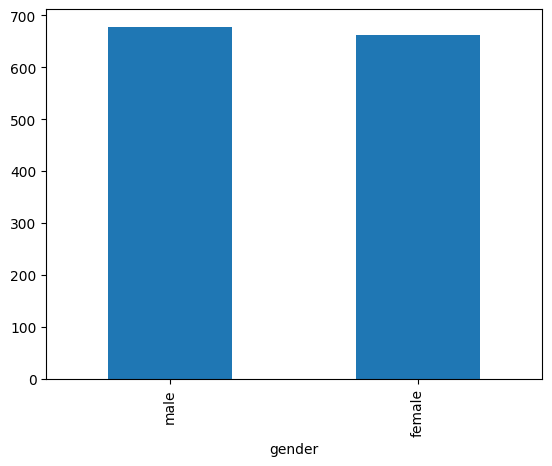

In [90]:
df['gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

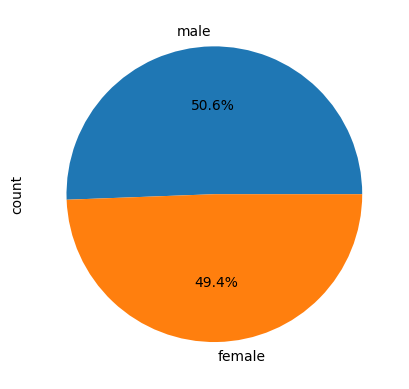

In [91]:
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [95]:
df['gender'].isnull().sum()

0

### Diabetic
** Conclusion **
- Distribution between diabetic and non-diabetic is nearly equal.
- No missing values in the column.

In [96]:
df['diabetic'].value_counts()

diabetic
No     698
Yes    642
Name: count, dtype: int64

<Axes: xlabel='diabetic'>

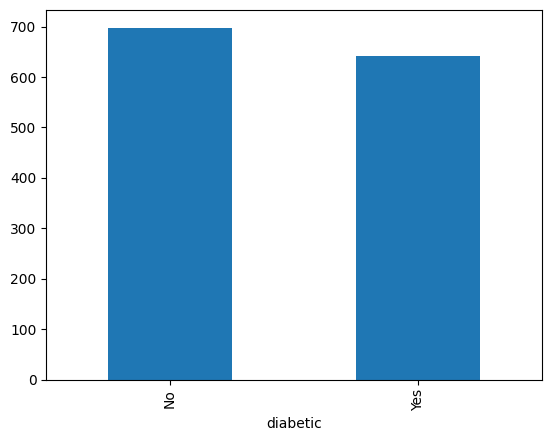

In [97]:
df['diabetic'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

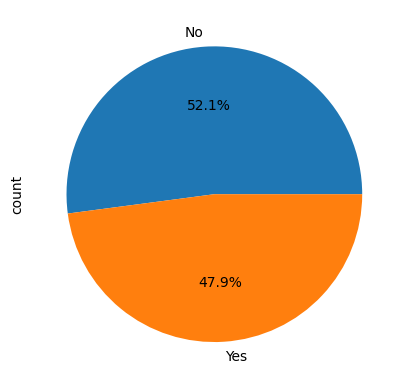

In [98]:
df['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [99]:
df['diabetic'].isnull().sum()

0

### Smoker
- There is lagre distribution between categories in the columns.
- No Null value is present.

In [100]:
df['smoker'].value_counts()

smoker
No     1066
Yes     274
Name: count, dtype: int64

<Axes: xlabel='smoker'>

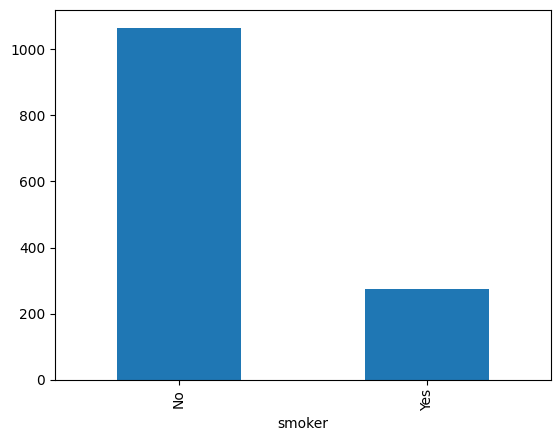

In [110]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

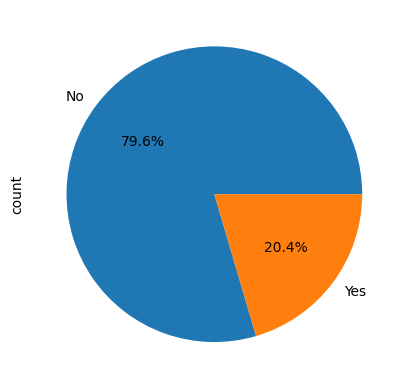

In [112]:
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%')


In [109]:
df['smoker'].isnull().sum()

0

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [113]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,38.078652,male,34.1,100,No,0,No,northwest,1137.01


In [114]:
pd.crosstab(df['claim'],df['age'])

age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0
claim,,,,,,,,,,,,,,,,,,,,,
1121.87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131.51,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1135.94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1136.40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1137.01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55135.40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58571.07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
60021.40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


** Adding a new Column **
- A new column is added to the dataset named as 'smoker_diabetic' as based on
 the patients who are smoker and diabetic both

In [123]:
def assign_value(row):
    if row['smoker'] == 'Yes' and row['diabetic'] == 'Yes':
        return 2
    elif row['smoker'] == 'Yes' or row['diabetic'] == 'Yes':
        return 1
    else:
        return 0

In [124]:
df['smoker_diabetic']= df.apply(assign_value, axis=1)

In [127]:
df['smoker_diabetic'].value_counts()

smoker_diabetic
1    644
0    560
2    136
Name: count, dtype: int64

#### Relation between gender column and the new added smoker_diabetic column

In [139]:
pd.crosstab(df['gender'],df['smoker_diabetic'])

smoker_diabetic,0,1,2
gender,,,
female,284,318,60
male,276,326,76


<Axes: xlabel='gender'>

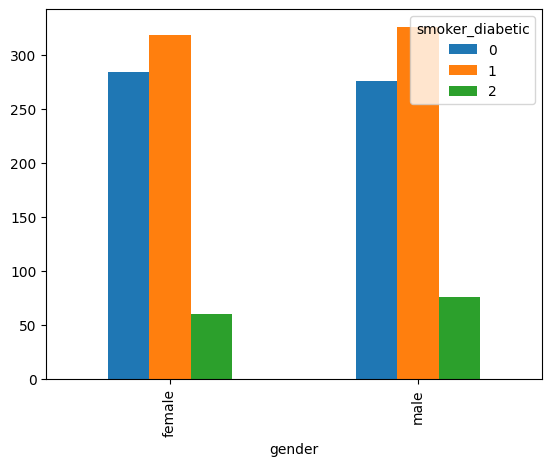

In [141]:
pd.crosstab(df['gender'],df['smoker_diabetic']).plot(kind ='bar')

#### Relation between age column and the new added smoker_diabetic column

In [163]:
pd.crosstab(df['age_category'],df['smoker_diabetic'])

smoker_diabetic,0,1,2
age_category,,,
0-20,30,34,7
21-30,121,169,35
31-40,159,176,40
41-50,168,167,42
51-60,82,98,12


<Axes: xlabel='age_category', ylabel='smoker_diabetic'>

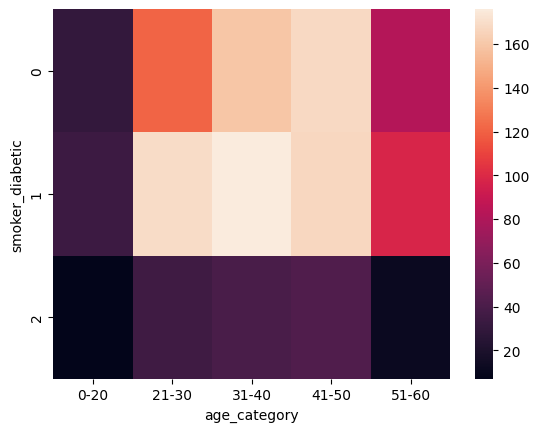

In [162]:
sns.heatmap(pd.crosstab(df['smoker_diabetic'],df['age_category']))

** Dividing the "Claim" column into bins by the help of Scott's rule because the the column is skewed not normalised **





In [136]:
n = len(df['claim'])
data_range = df['claim'].max() - df['claim'].min()
data_std = df['claim'].std()
bin_width = 3.5 * data_std / np.power(n, 1/3)
num_bins = int(np.ceil(data_range / bin_width))
num_bins

17

In [166]:
num_bins = 17
bins = np.linspace(df['claim'].min(), df['claim'].max(), num_bins + 1)
labels = [f'Bin{i}' for i in range(1, num_bins + 1)]

In [167]:
df['claim_distribution'] = pd.cut(df['claim'], bins=bins, labels=labels, include_lowest=True)


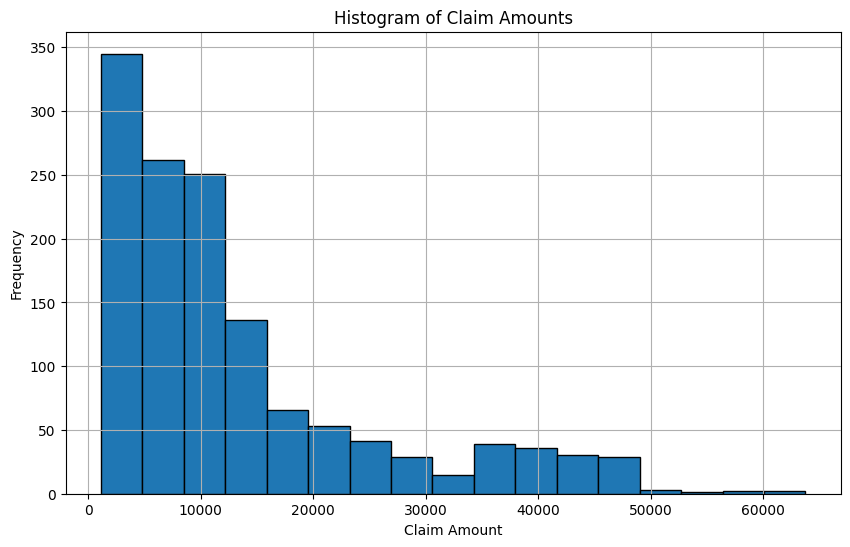

In [169]:
plt.figure(figsize=(10, 6))
plt.hist(df['claim'], bins=num_bins, edgecolor='black')
plt.title('Histogram of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

** Adding new column "age_category" on the basis of age column and checking its relation with different columns **



In [145]:
def age_distribution(num):
  if num<=20:
    return '0-20'
  elif num>20 and num<=30:
    return '21-30'
  elif num>30 and num<=40:
    return '31-40'
  elif num>40 and num<=50:
    return '41-50'
  elif num>50 and num<=60:
    return '51-60'
  else:
    return '61+'

In [146]:
df['age_category']=df['age'].apply(age_distribution)

In [147]:
df['age_category'].value_counts()

age_category
41-50    377
31-40    375
21-30    325
51-60    192
0-20      71
Name: count, dtype: int64

In [149]:
pd.crosstab(df['age_category'],df['gender'] ,normalize ='columns')*100

gender,female,male
age_category,,
0-20,0.000000,10.471976
21-30,18.580060,29.793510
31-40,24.924471,30.973451
41-50,27.492447,28.761062
51-60,29.003021,0.000000


<Axes: xlabel='age_category'>

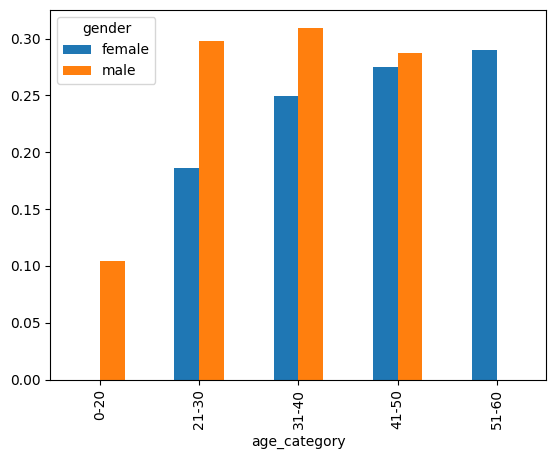

In [150]:
pd.crosstab(df['age_category'],df['gender'] ,normalize ='columns').plot(kind ='bar')

In [152]:
pd.crosstab(df['age_category'],df['smoker_diabetic'] ,normalize ='columns')*100

smoker_diabetic,0,1,2
age_category,,,
0-20,5.357143,5.279503,5.147059
21-30,21.607143,26.242236,25.735294
31-40,28.392857,27.329193,29.411765
41-50,30.000000,25.931677,30.882353
51-60,14.642857,15.217391,8.823529


<Axes: xlabel='age_category'>

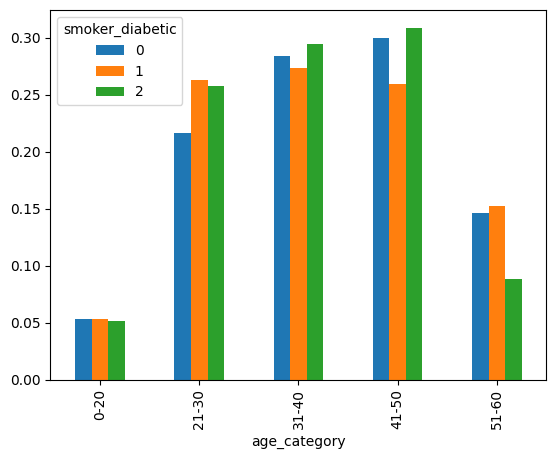

In [153]:
pd.crosstab(df['age_category'],df['smoker_diabetic'] ,normalize ='columns').plot(kind ='bar')

In [154]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 >= bmi:
        return 'Obese'


In [155]:
df['bmi_category'] = df['bmi'].apply(classify_bmi)

In [156]:
df['bmi_category'].value_counts()

bmi_category
Overweight       389
Normal weight    223
Underweight       20
Obese              9
Name: count, dtype: int64

In [157]:
pd.crosstab(df['bmi_category'],df['gender'] ,normalize ='columns')*100

gender,female,male
bmi_category,,
Normal weight,35.151515,34.405145
Obese,0.606061,2.250804
Overweight,60.606061,60.771704
Underweight,3.636364,2.572347


<Axes: xlabel='bmi_category'>

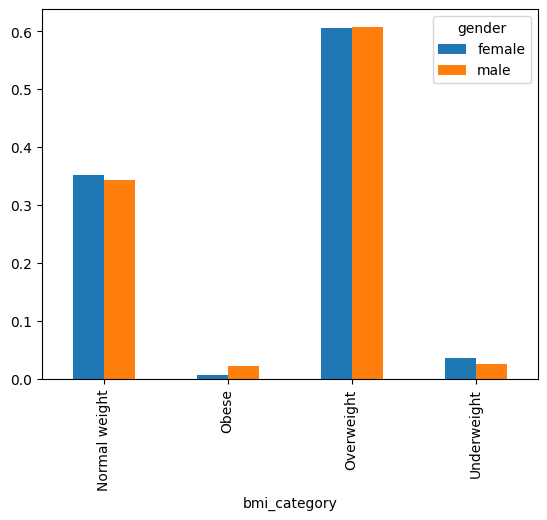

In [158]:
pd.crosstab(df['bmi_category'],df['gender'] ,normalize ='columns').plot(kind ='bar')

In [159]:
pd.crosstab(df['bmi_category'],df['age_category'] ,normalize ='columns')*100

age_category,0-20,21-30,31-40,41-50,51-60
bmi_category,,,,,
Normal weight,38.709677,41.007194,31.382979,33.513514,33.673469
Obese,0.000000,0.719424,3.191489,1.081081,0.000000
Overweight,58.064516,56.115108,60.638298,63.243243,63.265306
Underweight,3.225806,2.158273,4.787234,2.162162,3.061224


<Axes: xlabel='bmi_category'>

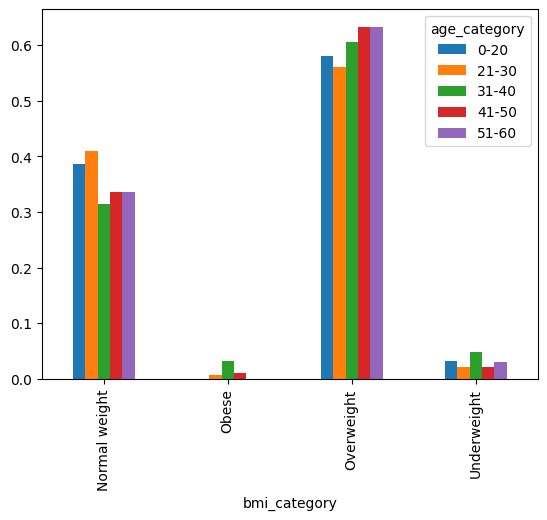

In [160]:
pd.crosstab(df['bmi_category'],df['age_category'] ,normalize ='columns').plot(kind ='bar')

In [170]:
pd.crosstab(df['bmi_category'],df['claim_distribution'] ,normalize ='columns')*100

claim_distribution,Bin1,Bin2,Bin3,Bin4,Bin5,Bin6,Bin7,Bin8,Bin9,Bin10,Bin11
bmi_category,,,,,,,,,,,
Normal weight,38.121547,29.770992,32.758621,40.677966,38.775510,39.534884,33.333333,26.315789,0.0,25.0,0.0
Obese,1.657459,0.763359,0.862069,1.694915,0.000000,2.325581,3.030303,0.000000,20.0,0.0,0.0
Overweight,55.801105,67.175573,63.793103,50.847458,59.183673,58.139535,63.636364,73.684211,60.0,75.0,100.0
Underweight,4.419890,2.290076,2.586207,6.779661,2.040816,0.000000,0.000000,0.000000,20.0,0.0,0.0


<Axes: xlabel='bmi_category'>

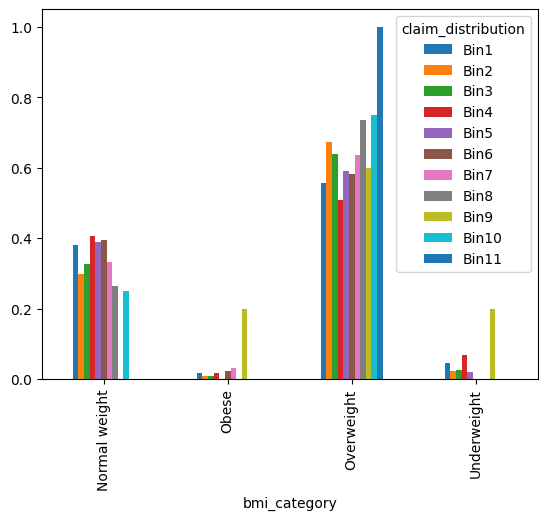

In [173]:
pd.crosstab(df['bmi_category'],df['claim_distribution'] ,normalize ='columns').plot(kind ='bar')

In [175]:
def division(num):
  if num<=120 :
    return 'normal'
  else:
    return 'high'

In [176]:
df['bp_category'] =df['bloodpressure'].apply(division)

In [177]:
df['bp_category'].value_counts()

bp_category
normal    1285
high        55
Name: count, dtype: int64

In [178]:
pd.crosstab(df['bp_category'],df['gender'] ,normalize ='columns')*100

gender,female,male
bp_category,,
high,3.625378,4.572271
normal,96.374622,95.427729


In [180]:
pd.crosstab(df['bp_category'],df['age_category'] ,normalize ='columns')*100

age_category,0-20,21-30,31-40,41-50,51-60
bp_category,,,,,
high,2.816901,4.615385,3.733333,5.039788,2.604167
normal,97.183099,95.384615,96.266667,94.960212,97.395833


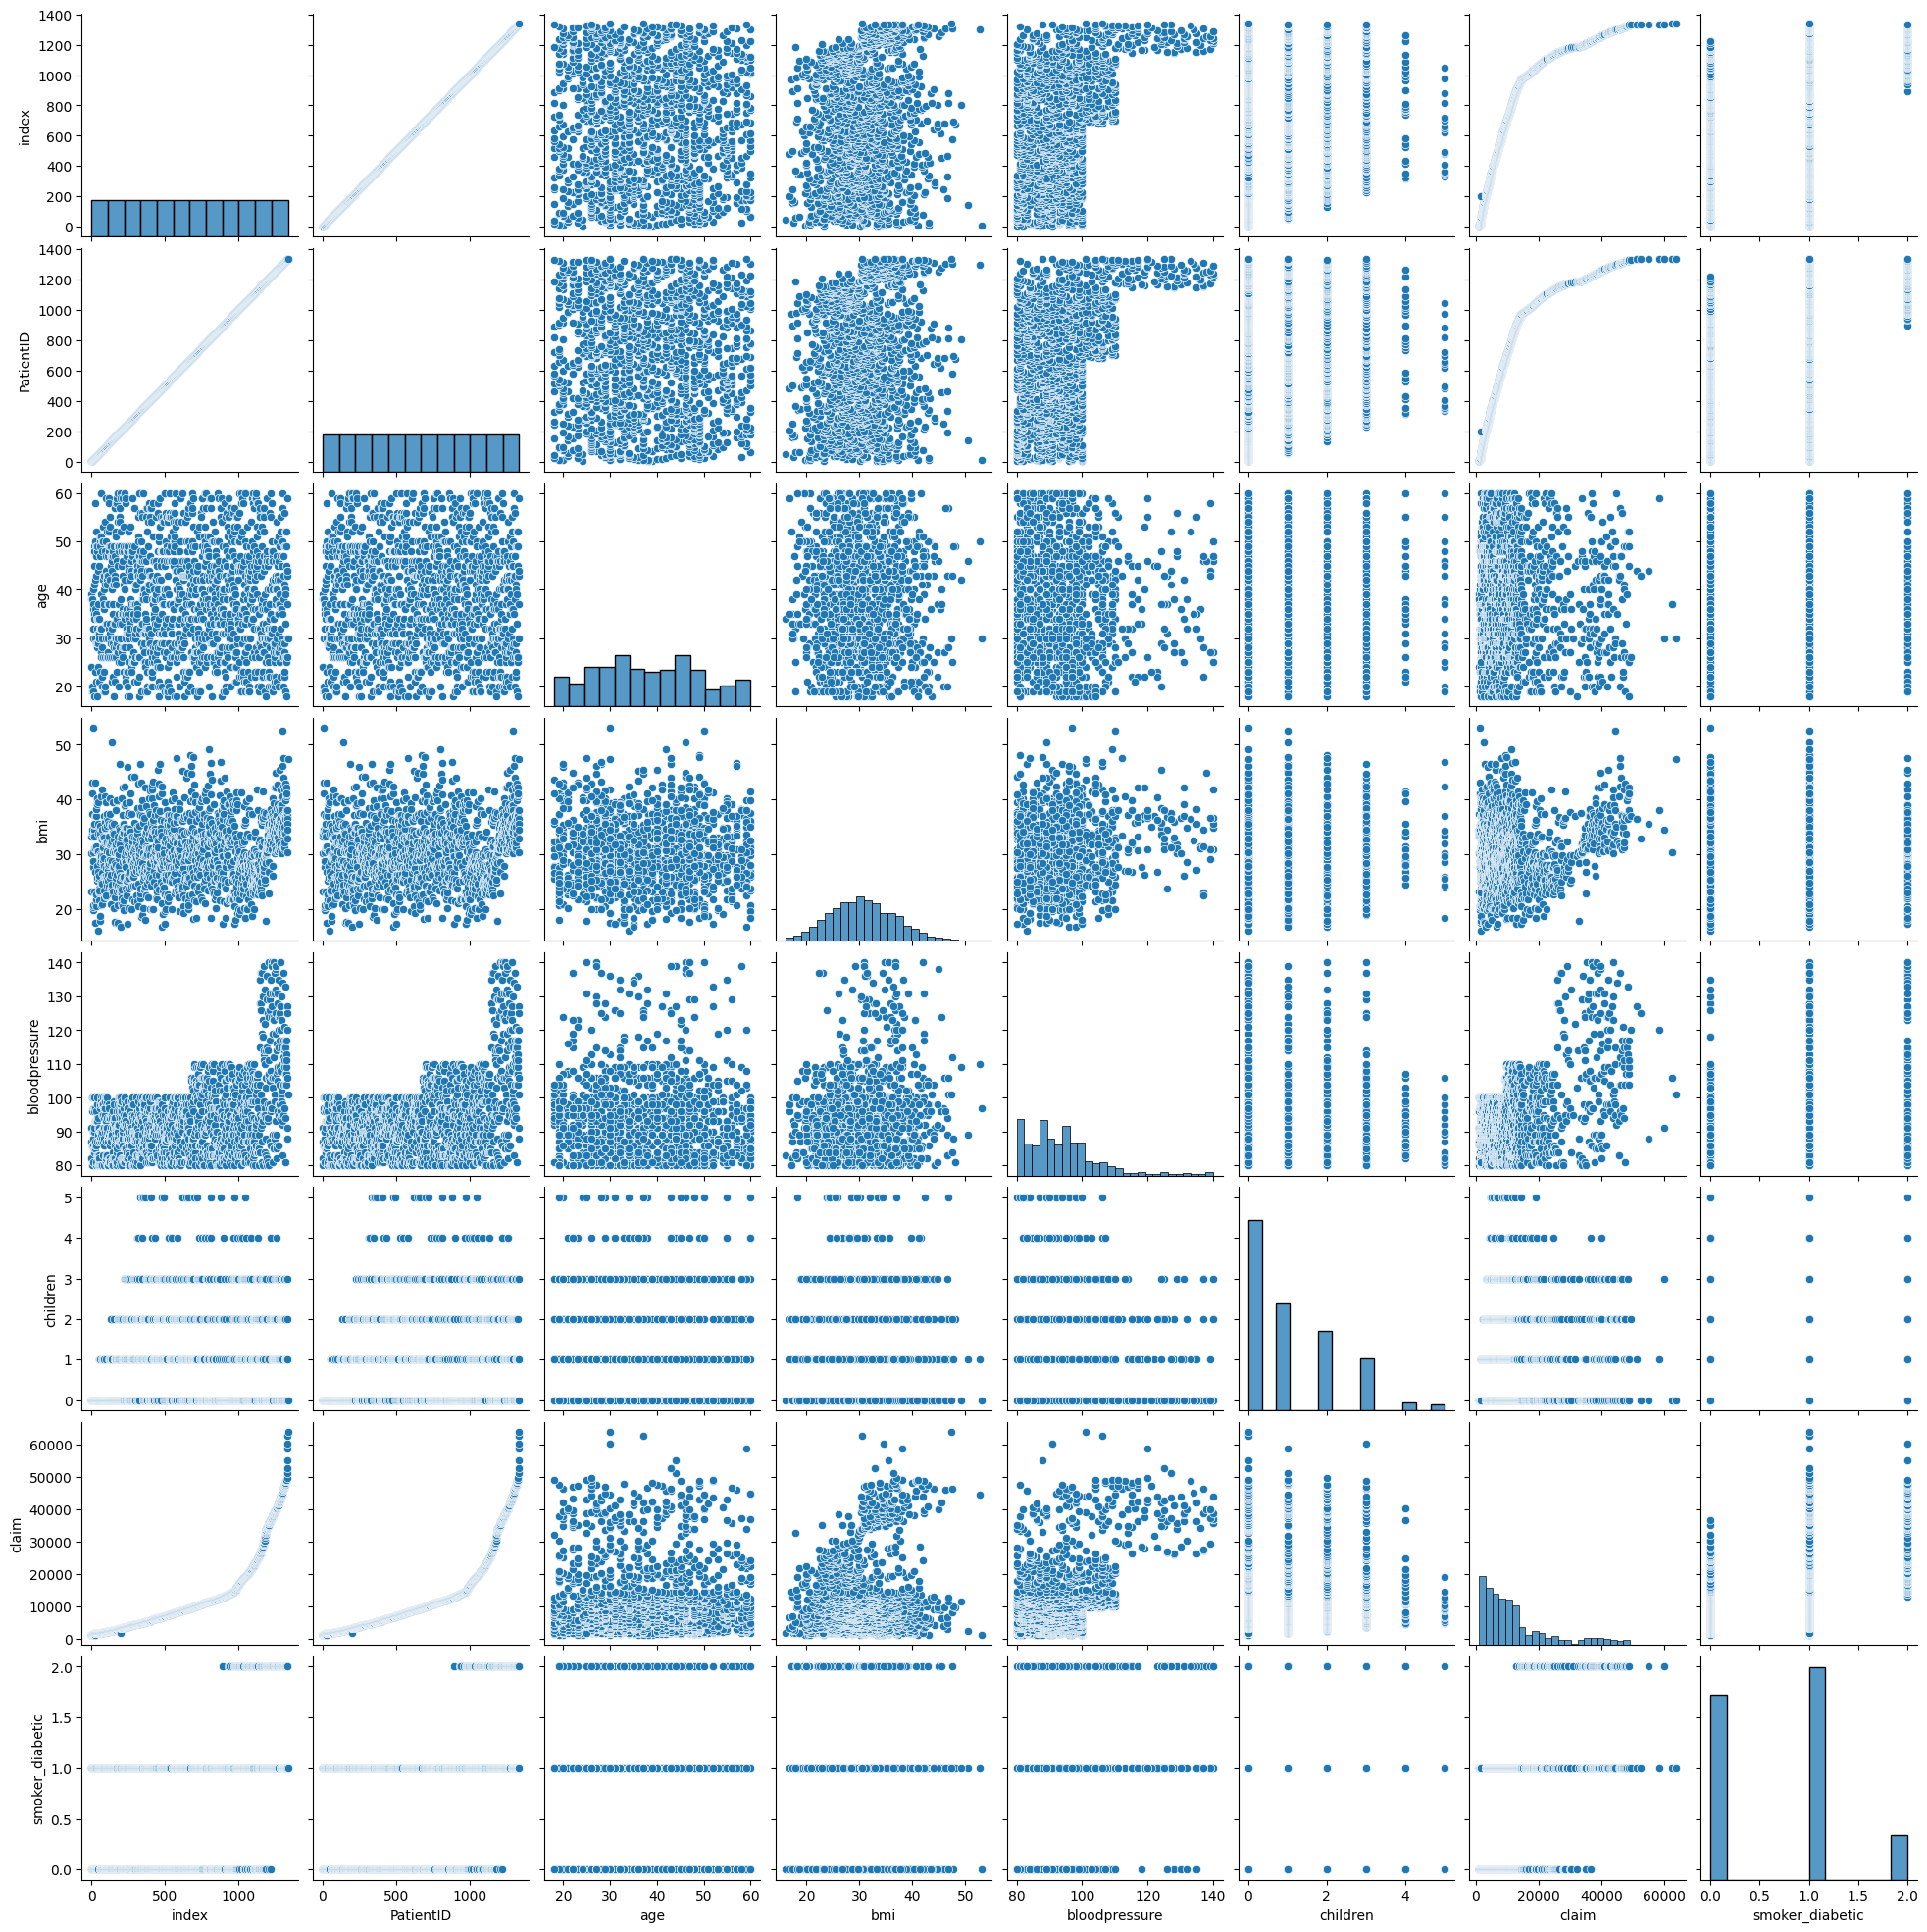

In [181]:
sns.pairplot(df)